# [**Tracé de prédictions validées par validation croisée**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/3_model_selection/plot_cv_predict.ipynb)<br/>([_Plotting Cross-Validated Predictions_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html))

Cet exemple montre comment utiliser [**`cross_val_predict`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) en combinaison avec [**`PredictionErrorDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html) pour visualiser les erreurs de prédiction.

Nous chargerons l'ensemble de données sur le diabète et créerons une instance d'un modèle de régression linéaire.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()

[**`cross_val_predict`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) renvoie un tableau de même taille que `y` où chaque entrée est une prédiction obtenue par validation croisée.

In [3]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lr, X, y, cv=10)

Étant donné que `cv=10`, cela signifie que nous avons entraîné 10 modèles et que chaque modèle a été utilisé pour prédire sur l'une des 10 partitions. Nous pouvons maintenant utiliser [**`PredictionErrorDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html) pour visualiser les erreurs de prédiction.

Sur l'axe de gauche, nous traçons les valeurs observées $y$ par rapport aux valeurs prédites $\hat{y}$ données par les modèles. Sur l'axe de droite, nous traçons les résidus (c'est-à-dire la différence entre les valeurs observées et les valeurs prédites) par rapport aux valeurs prédites.

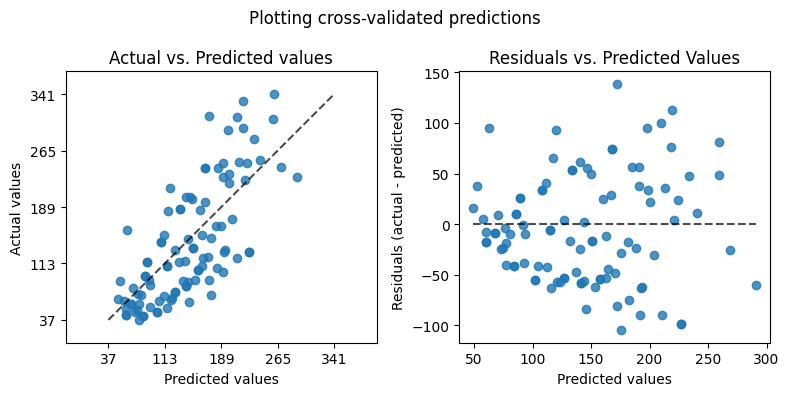

In [4]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

Il est important de noter que nous avons utilisé [**`cross_val_predict`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) uniquement à des fins de visualisation dans cet exemple.

Il serait problématique d'évaluer quantitativement les performances du modèle en calculant une seule métrique de performance à partir des prédictions concaténées renvoyées par [**`cross_val_predict`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) lorsque les différentes partitions CV varient en taille et en distribution.

Il est recommandé de calculer des métriques de performance par partition en utilisant [**`cross_val_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) ou [**`cross_validate`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) à la place.